# Set up environment

In [1]:
import sys
workdir = "/local_data/notebooks/clintko/GitRepo"
sys.path.append(workdir + "/Proj_SingleCell/Utils")
sys.path.append(workdir + "/Proj_SingleCell/ParametricTSNE/repo_parametric_tsne_jsilter")

In [2]:
import numpy as np

from parametric_tSNE import Parametric_tSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_iris
from Tool_ImportData import *
from Tool_flow2img import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')

/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Import / Load Data

In [3]:
data = read_EQAPOL([COSTIM, CMV, SEB, MARKERS])

Read Costim
Read CMV
Read SEB
Read Markers
The data Costim CMV SEB Markers are input.


In [4]:
print(data[COSTIM].shape)
print(data[CMV].shape)
print(data[SEB].shape)
print(data[MARKERS])

(11,)
(11,)
(11,)
{'FSC-H': 0, 'FSC-W': 1, 'FSC-A': 2, 'CD14 CD19 vAmine': 3, 'CD3 AmCyan': 4, 'CD4 PerCP Cy55': 5, 'CD8 APC Cy7': 6, 'CD45RO ECD': 7, 'CD27 APC': 8, 'CD57 FITC': 9, 'TNFa A700': 10, 'IL 2 PE': 11, 'IFNg PE Cy7': 12, 'CD107 PE Cy5': 13}


### Preprocess

Get the samples from three groups

In [5]:
dat_samples = np.array(
    list(data[COSTIM])[0:2] + 
    list(data[CMV])[0:2] + 
    list(data[SEB])[0:2])

dat_labels = [0, 0, 1, 1, 2, 2]

print("===== Raw Shape ======")
print(dat_samples.shape)
print(dat_samples[0].shape) # Costim
print(dat_samples[1].shape) # Costim
print(dat_samples[2].shape) # CMV
print(dat_samples[3].shape) # CMV
print(dat_samples[4].shape) # SEB
print(dat_samples[5].shape) # SEB

===== Raw Shape ======
(6,)
(455472, 14)
(607410, 14)
(411894, 14)
(515178, 14)
(422658, 14)
(519426, 14)


Scale the data

In [6]:
dat_samples_scaled = data_scaling(dat_samples)

randomly subset data points in each sample

In [7]:
print("===== 10,000 cells ======")
dat_labels_sub, dat_samples_sub = data_subsetting(
    dat_samples_scaled, 
    dat_labels, 
    k = 10000, 
    num_subsets = 2, 
    rand_seed   = 0,
    verbose = True)

print("===== Shape After subsetting ======")
print(dat_samples_sub.shape)
print(dat_samples_sub[0].shape) # Costim
print(dat_samples_sub[1].shape) # Costim
print(dat_samples_sub[2].shape) # Costim
print(dat_samples_sub[3].shape) # Costim
print(dat_samples_sub[4].shape) # CMV
print(dat_samples_sub[5].shape) # CMV
print(dat_samples_sub[6].shape) # CMV
print(dat_samples_sub[7].shape) # CMV
print(dat_samples_sub[8].shape) # SEB
print(dat_samples_sub[9].shape) # SEB
print(dat_samples_sub[10].shape) # SEB
print(dat_samples_sub[11].shape) # SEB

===== 10,000 cells ======
Data Subsetting...
...Finish
===== Shape After subsetting ======
(12, 10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)


# Dimensional Reduction: UMAP and parametric tSNE

### Pooled UMAP

In [8]:
print("===== Dim Reduct ======\n")
%time dat_umap_pool = create_umap_pool(dat_samples_sub, verbose = True)
dat_umap_pool = dat_umap_pool.reshape([12, -1, 2])

print("===== UMAP Shape ======")
print(dat_umap_pool.shape)

===== Dim Reduct ======

Create UMAP plots...
...Finish
CPU times: user 4min 30s, sys: 2min 21s, total: 6min 51s
Wall time: 2min 43s
===== UMAP Shape ======
(12, 10000, 2)


### parametric tSNE

In [9]:
print("Samples:", dat_samples_scaled[0].shape)
print("Labels: ", )

(455472, 14)

In [10]:
X = np.vstack(dat_samples_sub[[0, 4, 8]])
X_train, X_test = train_test_split(X, dat, train_size = 0.9)
print("Total: ", X.shape)
print("Train: ", X_train.shape)
print("Test:  ", X_test.shape)

(30000, 14)


Set up models

In [11]:
ptSNE_E1 = Parametric_tSNE(
    num_inputs  = dat_samples_scaled[0].shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

ptSNE_5E2 = Parametric_tSNE(
    num_inputs  = dat_samples_scaled[0].shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

**Fit**

In [ ]:
# === Train 100 epochs ===
epochs = 100
%time ptSNE_E1.fit(X_train, epochs = epochs, verbose = 1)

In [ ]:
# === Train 100 epochs ===
epochs = 500
%time ptSNE_5E2.fit(X_train, epochs = epochs, verbose = 0)

In [16]:
# === Train 100 epochs ===
epochs = 100
%time ptSNE_E1.fit(X, epochs = epochs, verbose = 0)

CPU times: user 4h 22min 36s, sys: 11min 42s, total: 4h 34min 18s
Wall time: 24min 3s


In [ ]:
# === Train 500 epochs ===
epochs = 500
%time ptSNE_5E2.fit(X, epochs = epochs, verbose = 0)

**Transform**

In [ ]:
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

In [17]:
y = list()
for idx in range(len(dat_samples_sub)):
    y.append(ptSNE_E1.transform(dat_samples_sub[idx]))
    
y = np.array(y)
print(y.shape)

(12, 10000, 2)


# Visualization

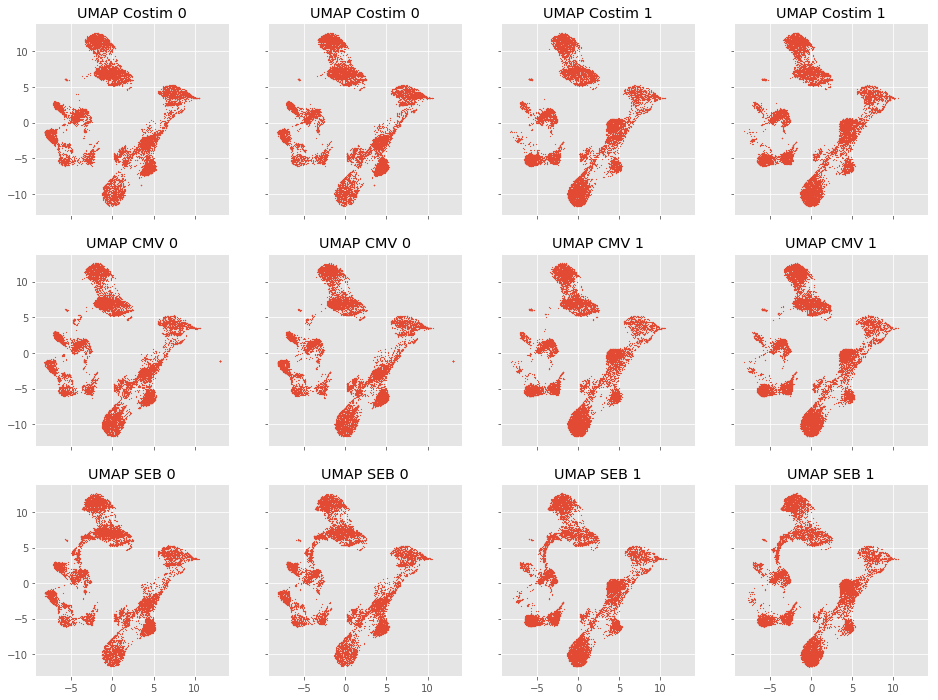

In [15]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            dat_umap_pool[idx][:, 0], 
            dat_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

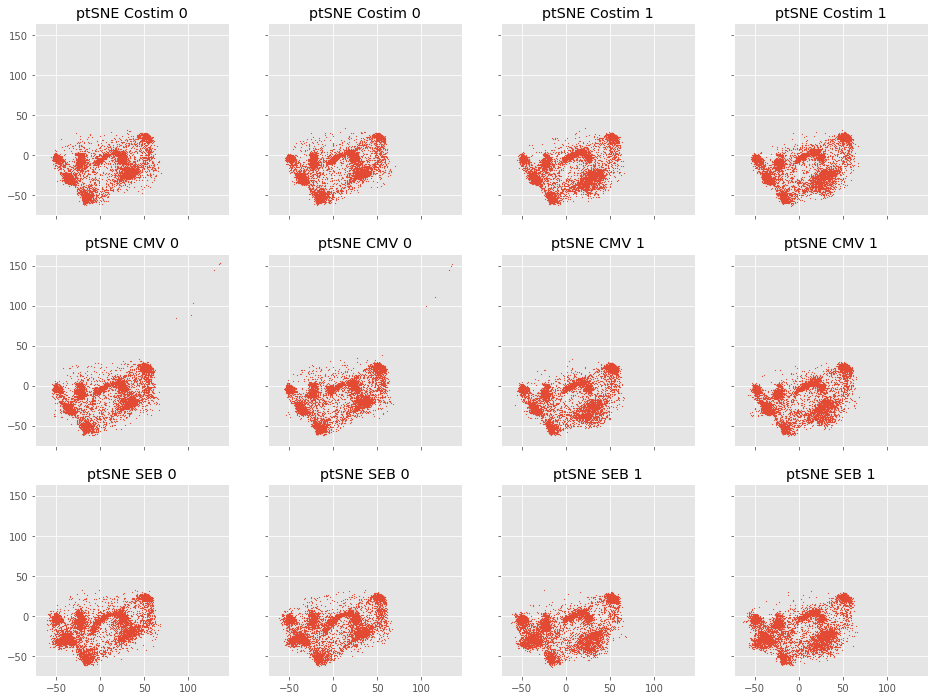

In [18]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "ptSNE " + plt_title[idx1] + " " + plt_sample[idx2])

plt.show()

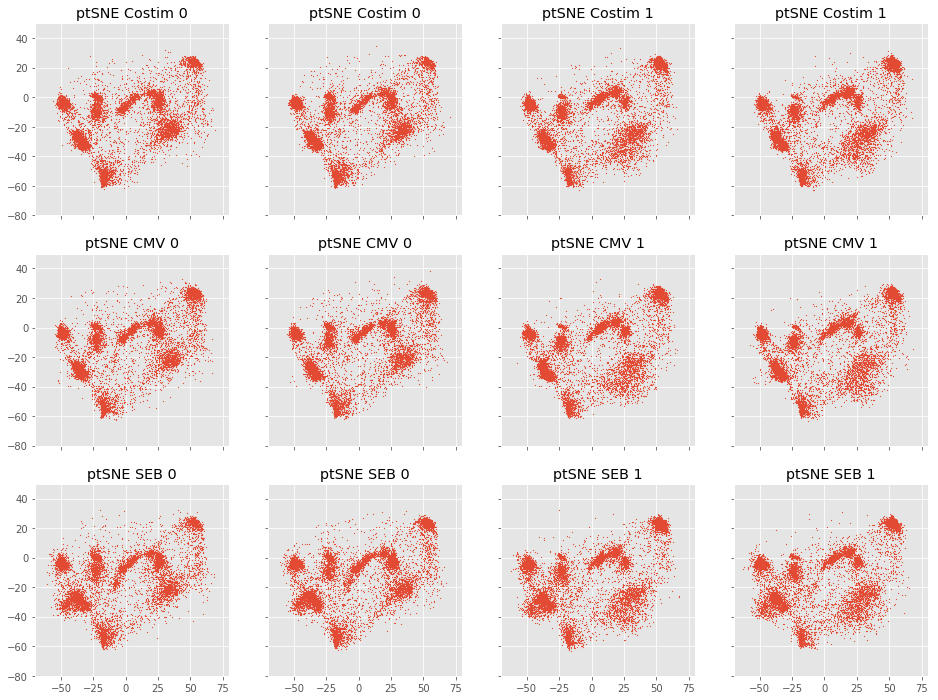

In [22]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "ptSNE " + plt_title[idx1] + " " + plt_sample[idx2])

axes[0, 0].set_xlim((-70, 80))
axes[0, 0].set_ylim((-80, 50))
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap_pool[idx][:, 0], 
            data_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])

#####################################################################
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "Approx. UMAP " + plt_title[idx1] + " " + plt_sample[idx2])

#####################################################################
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "Approx. UMAP " + plt_title[idx1] + " " + plt_sample[idx2])

#####################################################################
plt.show()

In [15]:
# PCA
print("=== PCA ===")
%time X_pca = PCA().fit_transform(iris.data)

# TSNE
print("\n=== tSNE ===")
%time X_tsne = TSNE(perplexity = 30, learning_rate=100).fit_transform(iris.data)

# Parametric TSNE
print("\n=== parametric tSNE (10) ===")
ptSNE_E1 = Parametric_tSNE(
    num_inputs  = iris.data.shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

epochs = 10
print("-----training ptSNE...")
%time ptSNE_E1.fit(iris.data, epochs = epochs, verbose = 0)
print("-----fit ptSNE...")
%time X_ptsne_E1 = ptSNE_E1.transform(iris.data)

print("\n=== parametric tSNE (500) ===")
ptSNE_5E2 = Parametric_tSNE(
    num_inputs  = iris.data.shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

epochs = 500
print("-----training ptSNE...")
%time ptSNE_5E2.fit(iris.data, epochs = epochs, verbose = 0)
print("-----fit ptSNE...")
%time X_ptsne_5E2 = ptSNE_5E2.transform(iris.data)

=== PCA ===
CPU times: user 704 µs, sys: 0 ns, total: 704 µs
Wall time: 584 µs

=== tSNE ===
CPU times: user 1.46 s, sys: 613 ms, total: 2.07 s
Wall time: 1.69 s

=== parametric tSNE (10) ===
-----training ptSNE...
CPU times: user 9.33 s, sys: 661 ms, total: 9.99 s
Wall time: 4.18 s
-----fit ptSNE...
CPU times: user 313 ms, sys: 0 ns, total: 313 ms
Wall time: 272 ms

=== parametric tSNE (500) ===
-----training ptSNE...
CPU times: user 5min 4s, sys: 29.3 s, total: 5min 33s
Wall time: 42.4 s
-----fit ptSNE...
CPU times: user 353 ms, sys: 1.74 ms, total: 355 ms
Wall time: 299 ms


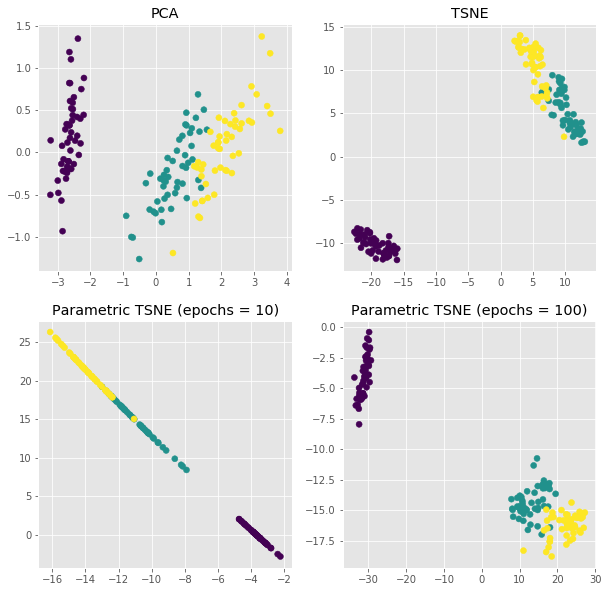

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("PCA")

plt.subplot(222)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title("TSNE")

plt.subplot(223)
plt.scatter(X_ptsne_E1[:, 0], X_ptsne_E1[:, 1], c=iris.target)
plt.title("Parametric TSNE (epochs = 10)")

plt.subplot(224)
plt.scatter(X_ptsne_5E2[:, 0], X_ptsne_5E2[:, 1], c=iris.target)
plt.title("Parametric TSNE (epochs = 100)")


plt.show()

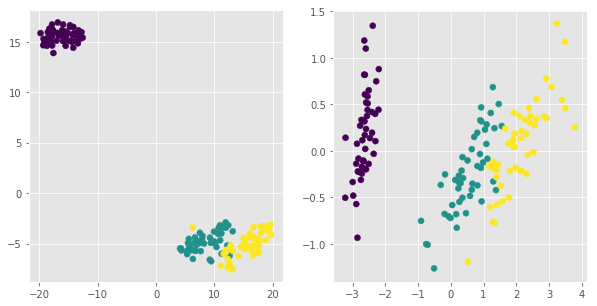

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)

plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

plt.show()